# Working with exit surveys from employees of the DETE and TAFE institute in Queensland Australia

In this project, we will work with exit surveys from employees of the Department of education, Training and Emplyment DETE and the Technical and Further Education TAFE institue in Queensland, Australia. You can find the TAFE exit survey [here](#https://data.gov.au/dataset/ds-qld-89970a3b-182b-41ea-aea2-6f9f17b5907e/details?q=exit%20survey) and 
Two data set : the survey for the DETE [here](#https://data.gov.au/dataset/ds-qld-fe96ff30-d157-4a81-851d-215f2a0fe26d/details?q=exit%20survey).

The aim of this project is to know :
1. Are employess who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employess who have been there longer?

2. Are younger employess resigning due to some kind of dissatisfaction? What about older employees? 


Below is a previex of a couple columns we will work with: 

1. Department of Education, Training and Employment (DETE)
    - ID: An id used to identify the participant of the survey
    - SeparationType: The reason why the person's employment ended
    - Cease Date: The year or month the person's employment ended
    - DETE Start Date: The year the person began employment with the DETE


2. Technical and Further Education (TAFE)
    - Record ID: An id used to identify the participant of the survey
    - Reason for ceasing employment: The reason why the person's employment ended
    - LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## 1. Import & Inspect data set

In [150]:
%matplotlib inline
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

In [151]:
dete_survey.head()

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [152]:
print(dete_survey.shape)
dete_survey.info()

(822, 56)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical wo

In [153]:
dete_survey.describe()

,ID
count,822.000000
mean,411.693431
std,237.705820
min,1.000000
25%,206.250000
50%,411.500000
75%,616.750000
max,823.000000


In [154]:
# sum null values
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

For the first data sel : DETE we can say according to our firt overwiew
- shape : (822, 56)
- there are a lot of missing value
- there are more string value than other type object
- need to convert to numeric some value

In [155]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [156]:
print(tafe_survey.shape)
tafe_survey.info()

(702, 72)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                  

In [157]:
tafe_survey.describe()

,Record ID,CESSATION YEAR
count,7.020000e+02,695.000000
mean,6.346026e+17,2011.423022
std,2.515071e+14,0.905977
min,6.341330e+17,2009.000000
25%,6.343954e+17,2011.000000
50%,6.345835e+17,2011.000000
75%,6.348005e+17,2012.000000
max,6.350730e+17,2013.000000


In [158]:
#sum missing value
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

For the second data set : TAFE, we can say according to our firt overwiew
- shape : (702, 74)
- there are a lot of missing value
- there are more string value than other type object
- need to convert to numeric some values

In [159]:
#check for all column
for i in dete_survey:
    des = dete_survey[i].describe()
    information = dete_survey[i].value_counts() 
    print(i)
    print(des)
    print('-----')
    print(information)
    print('---------------------')
    print('---------------------')
    print('\n')

ID
count    822.000000
mean     411.693431
std      237.705820
min        1.000000
25%      206.250000
50%      411.500000
75%      616.750000
max      823.000000
Name: ID, dtype: float64
-----
823    1
270    1
280    1
279    1
278    1
277    1
276    1
275    1
274    1
273    1
272    1
271    1
269    1
282    1
268    1
267    1
266    1
265    1
264    1
263    1
262    1
261    1
260    1
259    1
281    1
283    1
308    1
296    1
306    1
305    1
      ..
520    1
519    1
518    1
517    1
539    1
540    1
541    1
542    1
563    1
562    1
561    1
560    1
559    1
558    1
557    1
556    1
555    1
554    1
553    1
552    1
551    1
550    1
549    1
548    1
547    1
546    1
545    1
544    1
543    1
1      1
Name: ID, Length: 822, dtype: int64
---------------------
---------------------


SeparationType
count                822
unique                 9
top       Age Retirement
freq                 285
Name: SeparationType, dtype: object
-----
Age Retirement    

In [160]:
for i in tafe_survey:
    des = tafe_survey[i].describe()
    information = tafe_survey[i].value_counts() 
    print(i)
    print(des)
    print('-----')
    print(information)
    print('---------------------')
    print('---------------------')
    print('\n')

Record ID
count    7.020000e+02
mean     6.346026e+17
std      2.515071e+14
min      6.341330e+17
25%      6.343954e+17
50%      6.345835e+17
75%      6.348005e+17
max      6.350730e+17
Name: Record ID, dtype: float64
-----
6.342194e+17    1
6.349929e+17    1
6.342081e+17    1
6.345951e+17    1
6.341719e+17    1
6.343298e+17    1
6.342607e+17    1
6.345684e+17    1
6.346382e+17    1
6.345771e+17    1
6.345683e+17    1
6.349822e+17    1
6.348673e+17    1
6.348499e+17    1
6.347949e+17    1
6.344810e+17    1
6.347335e+17    1
6.343231e+17    1
6.345529e+17    1
6.345415e+17    1
6.345873e+17    1
6.346849e+17    1
6.347533e+17    1
6.347350e+17    1
6.347436e+17    1
6.348525e+17    1
6.347619e+17    1
6.345708e+17    1
6.346868e+17    1
6.345823e+17    1
               ..
6.347230e+17    1
6.345535e+17    1
6.345925e+17    1
6.345812e+17    1
6.343282e+17    1
6.341579e+17    1
6.343651e+17    1
6.348977e+17    1
6.344180e+17    1
6.345762e+17    1
6.342090e+17    1
6.349044e+17    1
6.

1. DETE INSTITUT 
    - Some value in Start Date are writting as "Not Started" but not NA, so didn't count as NA
    - Columns that we don't need for our analysis
    - important missing values
    - Standardize columns' name. 


2. TAFE INSTITUT
    - Important missing value during the question mark 
    - Columns that we don't need for our analysis
    - Long columns' name need to rename them.

## 2. Identify and drop columns unrelevant for our analyze

In [161]:
# change Not started value to NA in the dataset
dete_survey = pd.read_csv('dete_survey.csv', na_values='Not Stated')
dete_survey.head(3)
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                              34
DETE Start Date                         73
Role Start Date                         98
Position                                 5
Classification                         367
Region                                 105
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [162]:
#drop columns unrelevant
col_drop_dete = dete_survey.columns[28:49] #identification
dete_survey_updated = dete_survey.drop(col_drop_dete, axis=1) #drop columns and create a new dF
col_drop_tafe = tafe_survey.columns[17:66] #identification
tafe_survey_updated = tafe_survey.drop(col_drop_tafe, axis=1) #drop columns and create a new dF
dete_survey_updated.info() #verification

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 35 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [163]:
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

## 3. Rename and standardize the column names

In [164]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.replace(' ','_').str.strip() #standardize the columns name
dete_survey_updated.columns #verification

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [165]:
#Rename fisrt the following columns which are related to the DETE data set
tafe_survey_updated.rename({'Record ID': 'id'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'CESSATION YEAR': 'cease_date'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'Reason for ceasing employment': 'separationtype'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'Gender. What is your Gender?': 'gender'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'CurrentAge. Current Age': 'age'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'Employment Type. Employment Type' : 'employment_status'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'Classification. Classification': 'position'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'}, axis = 1, inplace=True)
tafe_survey_updated.rename({'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, axis = 1, inplace=True)

In [166]:
tafe_survey_updated.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

## 4. Analyze survey respondents who resigned
Identify the separationtype for our analyze which is Resigned/Resignation 

In [167]:
#Determine only the separation type for Resignation
dete_survey_updated['separationtype'] = dete_survey_updated['separationtype'].str.split('-').str[0] #take all the resignation and update
dete_survey_updated['separationtype'].value_counts()

Resignation                         311
Age Retirement                      285
Voluntary Early Retirement (VER)     67
Ill Health Retirement                61
Other                                49
Contract Expired                     34
Termination                          15
Name: separationtype, dtype: int64

In [168]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

Resignation type in both dataset:
    - dete_servey : Resignation-Other reasons + Resignation-Other employer + Resignation-Move overseas/interstate = 305
    - tafe_survey : Resignation = 340
 
Make a copy of the dataset in order to properly manipulate the dataset without making mistakes

In [169]:
#make a copy of these dateset to specific the resignation type
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype']=='Resignation'].copy()
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype']=='Resignation'].copy()

In [170]:
dete_resignations.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
3,4,Resignation,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
5,6,Resignation,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN
8,9,Resignation,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
9,10,Resignation,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,False,False,Female,46-50,NaN,NaN,NaN,NaN,NaN
11,12,Resignation,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,False,False,Male,31-35,NaN,NaN,NaN,NaN,NaN


## 5. Check if values contain any major inconsistencies

- cease date must be after dete start date
- start date have to be after 1940 
- role start date must be between cease and dete start date

In [171]:
# Analyze deeper cease_date 
dete_resignations['cease_date'].value_counts(dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
07/2006      1
09/2010      1
2010         1
Name: cease_date, dtype: int64

In [172]:
# Extract the year use str.extract() 
pattern = r'([2][0-9]{3})'
dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern,expand=True).astype(float)
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False) #verification

 2014.0     22
 2013.0    146
 2012.0    129
 2010.0      2
 2006.0      1
NaN         11
Name: cease_date, dtype: int64

In [173]:
#Analyze deeper dete_start_date
print('min: ', dete_resignations['dete_start_date'].min())
print('max: ', dete_resignations['dete_start_date'].max())
dete_resignations['dete_start_date'].value_counts().sort_index(ascending=False)

min:  1963.0
max:  2013.0


2013.0    10
2012.0    21
2011.0    24
2010.0    17
2009.0    13
2008.0    22
2007.0    21
2006.0    13
2005.0    15
2004.0    14
2003.0     6
2002.0     6
2001.0     3
2000.0     9
1999.0     8
1998.0     6
1997.0     5
1996.0     6
1995.0     4
1994.0     6
1993.0     5
1992.0     6
1991.0     4
1990.0     5
1989.0     4
1988.0     4
1987.0     1
1986.0     3
1985.0     3
1984.0     1
1983.0     2
1982.0     1
1980.0     5
1977.0     1
1976.0     2
1975.0     1
1974.0     2
1973.0     1
1972.0     1
1971.0     1
1963.0     1
Name: dete_start_date, dtype: int64

In [174]:
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending=False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

Visualized any values that look wrong 

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


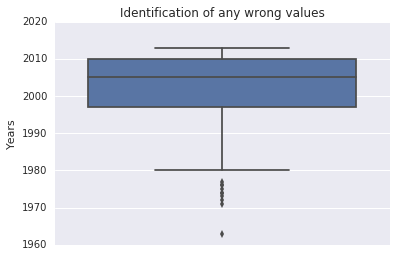

In [175]:
sns.boxplot(y = 'dete_start_date',data = dete_resignations)
plt.title('Identification of any wrong values')
plt.ylabel('Years')
plt.show()

/dataquest/system/env/python3/lib/python3.4/site-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


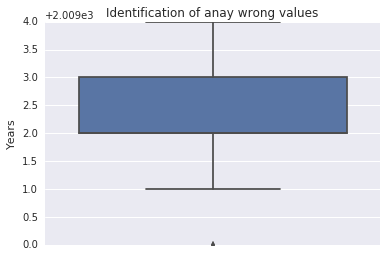

In [176]:
sns.boxplot(y = 'cease_date', data = tafe_resignations)
plt.title('Identification of anay wrong values')
plt.ylabel('Years')
plt.show()

There are few outliers, more in dete_resignations than in tafe_resignations however, it is nothing too significant.
Nonetheless there are some missing values in both data set. 

Remember that our goal is to defined :
1. Are employess who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employess who have been there longer?

2. Are younger employess resigning due to some kind of dissatisfaction? What about older employees? 

Let's display the two data set to see what we need to work on 

In [177]:
dete_resignations.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

In [178]:
tafe_resignations.columns

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')

In tafe_resignations there is a column which contains the length of time the employee spent in their workplace, nontheless this column does not exist in dete_resignations. Let's create it, by substract the cease_date - dete_start_date.


# 6. Create a new column


In [179]:
tafe_resignations['institute_service']

3                     NaN
4                     3-4
5                    7-10
6                     3-4
7                     3-4
8                     3-4
9                     1-2
10       Less than 1 year
13                  11-20
14                   7-10
15                  11-20
16                    NaN
17                   7-10
18                    NaN
19                    NaN
20                    NaN
21                    NaN
22                    5-6
23       Less than 1 year
24                   7-10
26                    NaN
27     More than 20 years
29       Less than 1 year
32       Less than 1 year
36                    NaN
37                    NaN
39                    NaN
40       Less than 1 year
41                  11-20
42                    3-4
              ...        
659                   1-2
660                   3-4
661                   5-6
665                   NaN
666                   NaN
669                   3-4
670                   NaN
671      Les

In [180]:
dete_resignations ['institute_service'] = dete_resignations['cease_date'] - dete_resignations['dete_start_date']
dete_resignations ['institute_service']

3       7.0
5      18.0
8       3.0
9      15.0
11      3.0
12     14.0
14      5.0
16      NaN
20     30.0
21     32.0
22     15.0
23     39.0
25     17.0
27      7.0
33      9.0
34      6.0
37      1.0
39      NaN
40     35.0
41     38.0
42      1.0
43     36.0
48      3.0
50      3.0
51     19.0
55      4.0
57      9.0
61      1.0
69      6.0
71      1.0
       ... 
747     6.0
751     8.0
752    15.0
753     9.0
755     1.0
762     0.0
766     7.0
769     5.0
770     NaN
771    12.0
774     NaN
784     0.0
786    20.0
788     NaN
789    31.0
790     6.0
791     NaN
794     NaN
797     NaN
798     NaN
802     NaN
803    10.0
804     6.0
806     8.0
807     9.0
808     3.0
815     2.0
816     2.0
819     5.0
821     NaN
Name: institute_service, Length: 311, dtype: float64

## 7. Identify columns to analyse who employees resigned because of dissatisfaction 

Below are the columns we'll use to categorize employees as dissatisfied from each dataframe. 

1/ Tafe_resignations
    - contribution Factors. Dissatisfaction
    - contribution Factors. Job dissatisfaction 
2/ Dete_resignations
    -Job dissastisfaction
    -Dissatisfaction with departmet
    - Physical work env
    - Lack of recognition
    - Lac of job security
    - work location
    - employment condition
    - work life balance
    - workload
    - (performance of superior)

In [181]:
# Select appropriate columns
tafe_diss = tafe_resignations[['Contributing Factors. Dissatisfaction','Contributing Factors. Job Dissatisfaction']]
tafe_diss

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,-,-
4,-,-
5,-,-
6,-,-
7,-,-
8,-,-
9,-,-
10,-,-
13,-,-
14,Contributing Factors. Dissatisfaction,Job Dissatisfaction


In [182]:
# Select appropriate columns
dete_diss = dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department','physical_work_environment','lack_of_recognition','lack_of_job_security','work_location','employment_conditions','work_life_balance','workload']]
dete_diss

,job_dissatisfaction,dissatisfaction_with_the_department,physical_work_environment,lack_of_recognition,lack_of_job_security,work_location,employment_conditions,work_life_balance,workload
3,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,True,False,False
8,False,False,False,False,False,False,False,False,False
9,True,True,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,False,False
14,True,True,False,False,False,False,False,False,False
16,False,False,False,True,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False
21,False,False,False,False,False,False,False,False,False


In [183]:
tafe_diss['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [184]:
tafe_diss['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

As we can see there are many value with the sign "-" in tafe_diss. We need to update its by boolean values.

### 7.1 Transforming Data to boolean

tafe_diss does not have bool values in Contribution Factors.Job Dissatisfaction & Contribution Factors. Dissatisfaction

dete_diss has bool values

In [185]:
# Convert the values in the two columns to TRUE, FALSE, NaN 
def update_val(val):
    if val == '-':
        return False
    elif pd.isnull(val):
        return np.nan
    else:
        return True

In [186]:
#Apply functions element to multiple column at once 
tafe_resignations_convert = tafe_diss.applymap(update_val)
tafe_resignations_convert

,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
10,False,False
13,False,False
14,True,True


### 7.2 Create new column dissatisfied in both data set

In [187]:
# Create a new columns "dissatisfied" if any element contains TRUE value
tafe_resignations['dissatisfied'] = tafe_resignations_convert.any(axis=1, skipna=False)
tafe_resignations['dissatisfied'].value_counts(dropna = False) #verified if the result are good

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [188]:
tafe_resignations_up = tafe_resignations.copy()#create a copy with dissatisfied column
tafe_resignations_up.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN,False
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,False
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,False
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,-,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,False
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,-,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,False


In [189]:
# Create new column "dissatisfied" in dete_resignation dataset
dete_resignations['dissatisfied'] = dete_diss.any(axis=1, skipna=True)
dete_resignations['dissatisfied'].value_counts(dropna = False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [190]:
# Make a copy
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts()

False    162
True     149
Name: dissatisfied, dtype: int64

To recap, for now we :
- renamed columns
- dropped any data not relevant for our analysis
- verified the quality of our data
- created a new **institute_service** column in dete_resignations
- cleaned the **contributing factors** columns in tafe_resignations with boolean types
- created a new column **dissatisfied** in both dF to indicate if an employee resigned because they were dissatisfied in some way

Next we will combine both data set.

## 8. Combine data set

### 8.1 Create a new column

To istinguish between the two data set, we create a column the know which institute belong the results.

In [191]:
# Create a new column named 
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

In [192]:
# Check the unique values after the updates
dete_resignations_up['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [193]:
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

### 8.2 - Combined the dataFrame

We will use pd.concat() because 2 DF with different length, more we don't have a KEY to use pd.merge()

In [194]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)
combined.head()

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,role_service,role_start_date,separationtype,south_sea,study/travel,torres_strait,traumatic_incident,work_life_balance,work_location,workload
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2006.0,Resignation,NaN,False,NaN,False,False,False,False
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1997.0,Resignation,NaN,False,NaN,False,False,False,False
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2008.0,Resignation,NaN,False,NaN,False,False,False,False
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2009.0,Resignation,NaN,False,NaN,False,False,False,False


In [195]:
combined['institute'] #check our new column

0      DETE
1      DETE
2      DETE
3      DETE
4      DETE
5      DETE
6      DETE
7      DETE
8      DETE
9      DETE
10     DETE
11     DETE
12     DETE
13     DETE
14     DETE
15     DETE
16     DETE
17     DETE
18     DETE
19     DETE
20     DETE
21     DETE
22     DETE
23     DETE
24     DETE
25     DETE
26     DETE
27     DETE
28     DETE
29     DETE
       ... 
621    TAFE
622    TAFE
623    TAFE
624    TAFE
625    TAFE
626    TAFE
627    TAFE
628    TAFE
629    TAFE
630    TAFE
631    TAFE
632    TAFE
633    TAFE
634    TAFE
635    TAFE
636    TAFE
637    TAFE
638    TAFE
639    TAFE
640    TAFE
641    TAFE
642    TAFE
643    TAFE
644    TAFE
645    TAFE
646    TAFE
647    TAFE
648    TAFE
649    TAFE
650    TAFE
Name: institute, Length: 651, dtype: object

In [196]:
combined.isnull().sum()
combined['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


### 8.3- Delete row which have less than 500 non null value

In [197]:
#use thresh parameter to drop columns with less than a certain number of non null values
combined_update = combined.dropna(thresh = 500, axis=1).copy() #make a copy
combined_update

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation
7,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation


Now that we have cobined our dataframes, we are almost at place where we can perform some kind of analysis.
First, though, we will have to clean up 

### 8.4- Cean up institute_service

To analyze data, we will convert the column institute_service into categories based on [this article](#https://www.businesswire.com/news/home/20171108006002/en/Age-Number-Engage-Employees-Career-Stage)

- We will use the slightly modified definitions below :
    - New < 3 years
    - Experienced between 3-6 years
    - Established between 7-10 years
    - Veteran 11 years or more

In [198]:
combined_update['institute_service'].value_counts(dropna=False)

NaN                   88
Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


In [199]:
#Extract years of service from each value
pattern = r'(\d+)'
combined_update['institute_service'] = combined_update['institute_service'].astype(str).str.extract(pattern)
combined_update['institute_service'].astype(float).value_counts(dropna=False)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()


 1.0     159
NaN       88
 3.0      83
 5.0      56
 7.0      34
 11.0     30
 0.0      20
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

In [200]:
#Create a function that maps each year value to one of the career stage as described above. 
def career(year):
    year =float(year)
    if year >= 11:
        return 'Veteran'
    elif 7 <= year <= 10:
        return 'Established between'
    elif 3 <= year <= 6:
        return 'Experienced between'
    elif pd.isnull(year):
        return np.nan
    else:
        return 'New'
    
combined_update['service_cat'] = combined_update['institute_service'].apply(career) #create a new column

combined_update['service_cat'].value_counts(dropna=False)

New                    193
Experienced between    172
Veteran                136
NaN                     88
Established between     62
Name: service_cat, dtype: int64

## 9. Analysis

First, we need to fill in missing values in the dissatisfied column and then aggregate.
**dissatisfied** column consist of Boolean values (true or false). Methods such as the df.pivot_table() method actually trat Boolean values as integers, so a True value is considered to be 1 and False to be 0. 
That means that we can aggregate the dissatisfied column and calculate the number of peaople in each group...


### 9.1 Dissatisfied
1. Are employess who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction ? What about employess who have been there longer?

In [201]:
combined_update['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [202]:
#fill the missing value with the more frequency value, here it is FALSE
combined_update['dissatisfied'] = combined_update['dissatisfied'].fillna(value=False)
combined_update['dissatisfied'].value_counts()

False    411
True     240
Name: dissatisfied, dtype: int64

In [203]:
#Calcul the percentage of dissatisfied employees in each service_cat group by using df.pivot_table()
percentage = combined_update.pivot_table(values ='dissatisfied',index = 'service_cat', aggfunc = [np.mean])
percentage = percentage*100

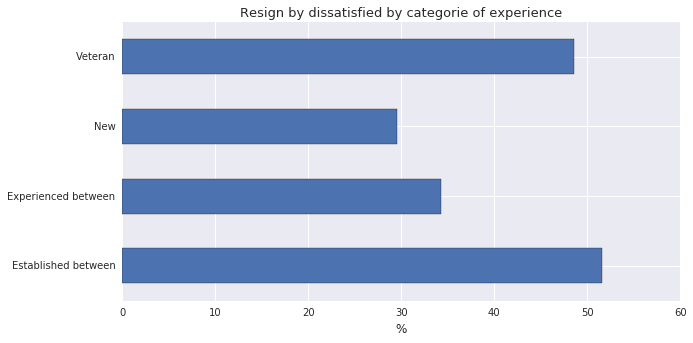

In [223]:
percentage.plot(kind='barh', figsize=(10,5))
plt.title('Resign by dissatisfied by categorie of experience', fontsize = 13)
plt.xlabel('%', fontsize = 12)
plt.ylabel('')
plt.legend('')
plt.show()

#### Answer first question
More than 50% of **established between** (3-6 years of experienced) resign due to dissatisfaction, then after is directly the veteran with less than 50%.
The new employee are less than 30% to resign due to dissatisfaction. 

### 9.2 Are younger employess resigning due to some kind of dissatisfaction? What about older employees? 

As above, we need to categories the value for age columns


In [205]:
combined_update['age'].value_counts(dropna=False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
36  40           32
26  30           32
31  35           32
56 or older      29
21-25            29
31-35            29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [206]:
combined_update['age'] = combined_update['age'].astype(str)
combined_update['age']

0            36-40
1            41-45
2            31-35
3            46-50
4            31-35
5            36-40
6            31-35
7      61 or older
8            56-60
9            51-55
10           46-50
11     61 or older
12           41-45
13           21-25
14           36-40
15     61 or older
16           21-25
17           21-25
18           56-60
19           51-55
20           41-45
21           51-55
22           21-25
23           21-25
24     61 or older
25           26-30
26           46-50
27           31-35
28           36-40
29           36-40
          ...     
621         46  50
622         41  45
623         46  50
624            nan
625            nan
626         26  30
627            nan
628         46  50
629          51-55
630         41  45
631         36  40
632          51-55
633    56 or older
634         26  30
635         26  30
636         41  45
637         41  45
638         26  30
639         41  45
640         46  50
641         41  45
642         

In [211]:
def age(x):
    x =str(x)
    if x[0] == '2':
        return '20s'
    elif x[0] == '3':
        return '30s'
    elif x[0] == '4':
        return '40s'
    elif x[0] == '5':
        return '50s'
    elif x[0] == '6':
        return '60s'
    elif pd.isnull(x):
        return np.nan
    
combined_update['age_cat'] = combined_update['age'].apply(age) #create a new column
combined_update['age_cat'].value_counts(dropna = False)
combined_update['age_cat']

0       30s
1       40s
2       30s
3       40s
4       30s
5       30s
6       30s
7       60s
8       50s
9       50s
10      40s
11      60s
12      40s
13      20s
14      30s
15      60s
16      20s
17      20s
18      50s
19      50s
20      40s
21      50s
22      20s
23      20s
24      60s
25      20s
26      40s
27      30s
28      30s
29      30s
       ... 
621     40s
622     40s
623     40s
624    None
625    None
626     20s
627    None
628     40s
629     50s
630     40s
631     30s
632     50s
633     50s
634     20s
635     20s
636     40s
637     40s
638     20s
639     40s
640     40s
641     40s
642    None
643     50s
644     20s
645    None
646     20s
647     50s
648    None
649     50s
650     20s
Name: age_cat, Length: 651, dtype: object

In [219]:
#Calcul the percentage of dissatisfied employees in each age group by using df.pivot_table()
percentage_age = round((combined_update.pivot_table(values = 'dissatisfied', index ='age_cat', aggfunc = [np.mean]))*100,2)
percentage_age

,mean
,dissatisfied
age_cat,
20s,35.25
30s,35.82
40s,37.93
50s,40.48
60s,52.17


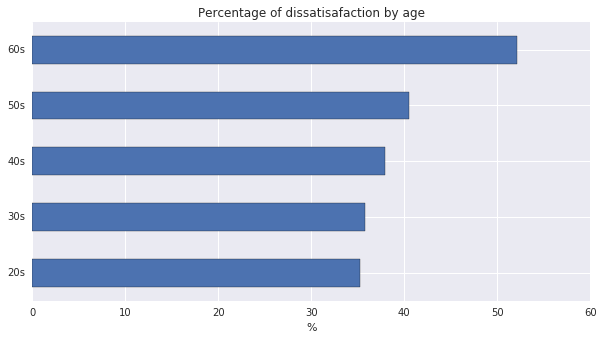

In [221]:
percentage_age.plot(kind='barh', legend=False,figsize=(10,5) )
plt.ylabel('')
plt.xlabel('%')
plt.title('Percentage of dissatisafaction by age')
plt.show()

More employee are older more they resign due to dissatisfaction than younger. This is the case for all part of age. Further, more than 35% of resignation is due to dissatisfaction for both institute. 

### 9.3 Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in somme way?

In [237]:
#Calcul the percentage of dissatisfied employees in each age group by using df.pivot_table()
percentage_institute = combined_update.pivot_table(values = 'dissatisfied', index = 'institute', aggfunc = [np.sum])
percentage_institute

,sum
,dissatisfied
institute,
DETE,149.0
TAFE,91.0


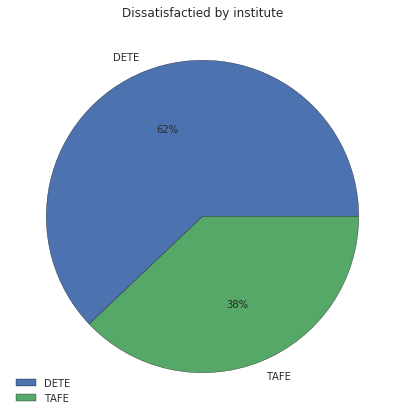

In [253]:
percentage_institute.plot.pie( subplots=True, figsize=(7, 7), autopct='%1.0f%%')
plt.title('Percentage of dissatisfaction by institute', fontsize = 12)
plt.ylabel('')


In DETE institute, there are 1.6 more resignation by dissatisfaction than in TAFE institute.

In [254]:
combined_update

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype,service_cat,age_cat
0,36-40,2012.0,False,Permanent Full-time,Female,4.000000e+00,DETE,7,Teacher,Resignation,Established between,30s
1,41-45,2012.0,True,Permanent Full-time,Female,6.000000e+00,DETE,18,Guidance Officer,Resignation,Veteran,40s
2,31-35,2012.0,False,Permanent Full-time,Female,9.000000e+00,DETE,3,Teacher,Resignation,Experienced between,30s
3,46-50,2012.0,True,Permanent Part-time,Female,1.000000e+01,DETE,15,Teacher Aide,Resignation,Veteran,40s
4,31-35,2012.0,False,Permanent Full-time,Male,1.200000e+01,DETE,3,Teacher,Resignation,Experienced between,30s
5,36-40,2012.0,False,Permanent Full-time,Female,1.300000e+01,DETE,14,Teacher,Resignation,Veteran,30s
6,31-35,2012.0,True,Permanent Full-time,Male,1.500000e+01,DETE,5,Teacher,Resignation,Experienced between,30s
7,61 or older,2012.0,True,Permanent Part-time,Male,1.700000e+01,DETE,NaN,Teacher Aide,Resignation,NaN,60s
8,56-60,2012.0,False,Permanent Full-time,Male,2.100000e+01,DETE,30,Teacher,Resignation,Veteran,50s
9,51-55,2012.0,False,Permanent Part-time,Female,2.200000e+01,DETE,32,Cleaner,Resignation,Veteran,50s


### 9.4 Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in somme way?

In [257]:
#Calcul the percentage of dissatisfied employees in each age group by using df.pivot_table()
percentage_gender = round(combined_update.pivot_table(values = 'dissatisfied', index = 'gender', aggfunc = [np.mean])*100,2)
percentage_gender

,mean
,dissatisfied
gender,
Female,37.03
Male,39.88


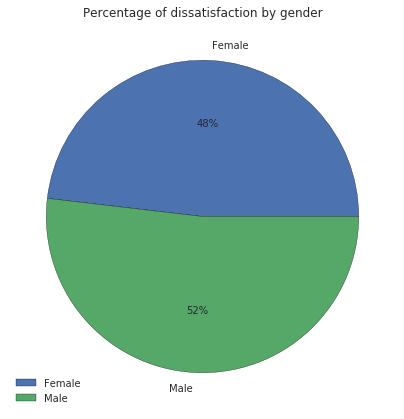

In [260]:
percentage_gender.plot.pie(subplots=True, figsize=(7, 7), autopct='%1.0f%%')
plt.ylabel('')
plt.title('Percentage of dissatisfaction by gender')

The percentage of dissatisfaction by gender is more or less the same.

## Conclusion

In this project, we analyzed the exit surveys of employees of the DETE and TAFE institutes. We focused on those who resigned due to some of job dissatisfaction and concluded :
- young, inexperienced employees resigned least often due to job dissatisfaction,
- more DETE employees resign by dissatisfaction than TAFE employees